# **IMDB Movie Rating Prediction**
![Twitter impact on stocks](https://drive.google.com/uc?id=1UuYmDxs15e5I5Buklb_lYOatXZ2DyfM4)

## **Objective :**


1.   Analyze and understand the important features contributing in IMDB score prediction.
2.   Build models to predict the IMDB scores.


### **Analysis Roadmap**


1.   **Import Data**
2.   **Exploratory Data Analysis(EDA)**
     

*   Check Shape, Head and distribution of data
*   Re-arrange the columns


3.  **Data Cleaning and Train-Validation Split**


*   Check and remove duplicates
*   Remove redundant columns
*   Remove redundant observations
*   Numeric and categorical split
*   Dummification of caegorical variables
*   Vectorization of 'Plot Keywords'and 'Movie Titles'.
*   Split data in train and validation sets 
*   Imputation and Standardization

4. **Feature Engineering**
*   Add new columns

5.  **Visualization**
*   Univariate Analysis
*   Bi-variate Analysis

6. **Algorithm implementation and model building**
7. **Conclusion** 






### **Import Libraries and Data**

In [0]:
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import scipy.stats as sps
    import re
    %matplotlib inline
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score,mean_absolute_error
    import pandas_profiling

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [0]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import KFold
from collections import defaultdict
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [0]:
data = pd.read_csv("movie_metadata.csv")

In [0]:
profile = pandas_profiling.ProfileReport(data)
#profile

### **2. Exploratory Data Analysis**

In [43]:
data.shape

(5043, 28)

In [44]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### **Re-arrange columns**




In [45]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [0]:
data = data[['movie_title','title_year','duration', 'budget', 'movie_facebook_likes',
                       'director_name','director_facebook_likes',
                       'actor_1_name','actor_1_facebook_likes',
                       'actor_2_name','actor_2_facebook_likes',
                       'actor_3_name', 'actor_3_facebook_likes',
                       'gross', 'genres','plot_keywords','language', 'country',
                       'facenumber_in_poster','num_voted_users', 'cast_total_facebook_likes',
                       'num_critic_for_reviews','movie_imdb_link', 'num_user_for_reviews',
                       'content_rating','aspect_ratio', 'color','imdb_score']]

In [47]:
data.head(2)

,movie_title,title_year,duration,budget,movie_facebook_likes,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,gross,genres,plot_keywords,language,country,facenumber_in_poster,num_voted_users,cast_total_facebook_likes,num_critic_for_reviews,movie_imdb_link,num_user_for_reviews,content_rating,aspect_ratio,color,imdb_score
0,Avatar,2009.0,178.0,237000000.0,33000,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,English,USA,0.0,886204,4834,723.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,PG-13,1.78,Color,7.9
1,Pirates of the Caribbean: At World's End,2007.0,169.0,300000000.0,0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,309404152.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,English,USA,0.0,471220,48350,302.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,PG-13,2.35,Color,7.1


#### **Check data distribution**

In [48]:
data.describe()

,title_year,duration,budget,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,gross,facenumber_in_poster,num_voted_users,cast_total_facebook_likes,num_critic_for_reviews,num_user_for_reviews,aspect_ratio,imdb_score
count,4935.000000,5028.000000,4.551000e+03,5043.000000,4939.000000,5036.000000,5030.000000,5020.000000,4.159000e+03,5030.000000,5.043000e+03,5043.000000,4993.000000,5022.000000,4714.000000,5043.000000
mean,2002.470517,107.201074,3.975262e+07,7525.964505,686.509212,6560.047061,1651.754473,645.009761,4.846841e+07,1.371173,8.366816e+04,9699.063851,140.194272,272.770808,2.220403,6.442138
std,12.474599,25.197441,2.061149e+08,19320.445110,2813.328607,15020.759120,4042.438863,1665.041728,6.845299e+07,2.013576,1.384853e+05,18163.799124,121.601675,377.982886,1.385113,1.125116
min,1916.000000,7.000000,2.180000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.620000e+02,0.000000,5.000000e+00,0.000000,1.000000,1.000000,1.180000,1.600000
25%,1999.000000,93.000000,6.000000e+06,0.000000,7.000000,614.000000,281.000000,133.000000,5.340988e+06,0.000000,8.593500e+03,1411.000000,50.000000,65.000000,1.850000,5.800000
50%,2005.000000,103.000000,2.000000e+07,166.000000,49.000000,988.000000,595.000000,371.500000,2.551750e+07,1.000000,3.435900e+04,3090.000000,110.000000,156.000000,2.350000,6.600000
75%,2011.000000,118.000000,4.500000e+07,3000.000000,194.500000,11000.000000,918.000000,636.000000,6.230944e+07,2.000000,9.630900e+04,13756.500000,195.000000,326.000000,2.350000,7.200000
max,2016.000000,511.000000,1.221550e+10,349000.000000,23000.000000,640000.000000,137000.000000,23000.000000,7.605058e+08,43.000000,1.689764e+06,656730.000000,813.000000,5060.000000,16.000000,9.500000


#### **Check unique values for all the features**

In [49]:
data.nunique()

movie_title                  4917
title_year                     91
duration                      191
budget                        439
movie_facebook_likes          876
director_name                2398
director_facebook_likes       435
actor_1_name                 2097
actor_1_facebook_likes        878
actor_2_name                 3032
actor_2_facebook_likes        917
actor_3_name                 3521
actor_3_facebook_likes        906
gross                        4035
genres                        914
plot_keywords                4760
language                       47
country                        65
facenumber_in_poster           19
num_voted_users              4826
cast_total_facebook_likes    3978
num_critic_for_reviews        528
movie_imdb_link              4919
num_user_for_reviews          954
content_rating                 18
aspect_ratio                   22
color                           2
imdb_score                     78
dtype: int64

In [50]:
data.shape

(5043, 28)

#### **Observations :**
Number of rows in data are greater than the unique values in movie title column. Means there are duplicate records which needs to be removed.


#### **Drop Duplicate rows**

In [0]:
data = data.drop_duplicates()

In [52]:
data.shape

(4998, 28)

In [53]:
data.head()

,movie_title,title_year,duration,budget,movie_facebook_likes,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,gross,genres,plot_keywords,language,country,facenumber_in_poster,num_voted_users,cast_total_facebook_likes,num_critic_for_reviews,movie_imdb_link,num_user_for_reviews,content_rating,aspect_ratio,color,imdb_score
0,Avatar,2009.0,178.0,237000000.0,33000,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,English,USA,0.0,886204,4834,723.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,PG-13,1.78,Color,7.9
1,Pirates of the Caribbean: At World's End,2007.0,169.0,300000000.0,0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,309404152.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,English,USA,0.0,471220,48350,302.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,PG-13,2.35,Color,7.1
2,Spectre,2015.0,148.0,245000000.0,85000,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,200074175.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,English,UK,1.0,275868,11700,602.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,PG-13,2.35,Color,6.8
3,The Dark Knight Rises,2012.0,164.0,250000000.0,164000,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,448130642.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,English,USA,0.0,1144337,106759,813.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,PG-13,2.35,Color,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,0,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,NaN,NaN,NaN,Documentary,NaN,NaN,NaN,0.0,8,143,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1



#### **Check Missing values count and percentage from each column**

In [0]:
#Below Function gives missing values and their Percentage  from each column. 

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has "+ str(df.shape[0]) +" rows and " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [55]:
missing_values_table(data)

Your selected dataframe has 4998 rows and 28 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
gross,874,17.5
budget,487,9.7
aspect_ratio,327,6.5
content_rating,301,6.0
plot_keywords,152,3.0
title_year,107,2.1
director_name,103,2.1
director_facebook_likes,103,2.1
num_critic_for_reviews,49,1.0
actor_3_facebook_likes,23,0.5


#### **Observation**
As gross and budget have maximum missing values, and we want to keep these two variables for the analysis, we can only **drop the observations** with null values for gross and budget because imputation may mislead us to wrong predctions.

In [56]:
data.shape

(4998, 28)

In [0]:
data.dropna(subset=['budget','gross'],inplace=True)

In [58]:
data.shape

(3857, 28)

In [101]:
((4798-3857)/4798)*100

19.612338474364318

##### **Note : 19 % observations removed in above action**

In [102]:
missing_values_table(data)

Your selected dataframe has 3857 rows and 28 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
aspect_ratio,74,1.9
content_rating,51,1.3
plot_keywords,31,0.8
actor_3_name,10,0.3
actor_3_facebook_likes,10,0.3
facenumber_in_poster,6,0.2
actor_2_name,5,0.1
actor_2_facebook_likes,5,0.1
actor_1_name,3,0.1
actor_1_facebook_likes,3,0.1


In [0]:
#Below Function gives unique values and data types from each column. 

def unique_values_table(df):
        unique_val = df.nunique()
        datatype = df.dtypes
        unq_val_table = pd.concat([unique_val,datatype], axis=1)
        unq_val_table_ren_columns = unq_val_table.rename(
        columns = {0 : 'Unique Values', 1 : 'Data Type'})
        return unq_val_table_ren_columns

In [75]:
 unique_values_table(data)

,Unique Values,Data Type
movie_title,3789,object
title_year,75,category
duration,156,float64
budget,373,float64
movie_facebook_likes,700,int64
director_name,1753,object
director_facebook_likes,400,float64
actor_1_name,1509,object
actor_1_facebook_likes,738,float64
actor_2_name,2288,object


In [0]:
# convert title year data type from float to the categorical 

data.title_year = round(data.title_year).astype('category')
data.facenumber_in_poster = round(data.facenumber_in_poster).astype('category')

#### **Understanding Correlation between Numerical variables**

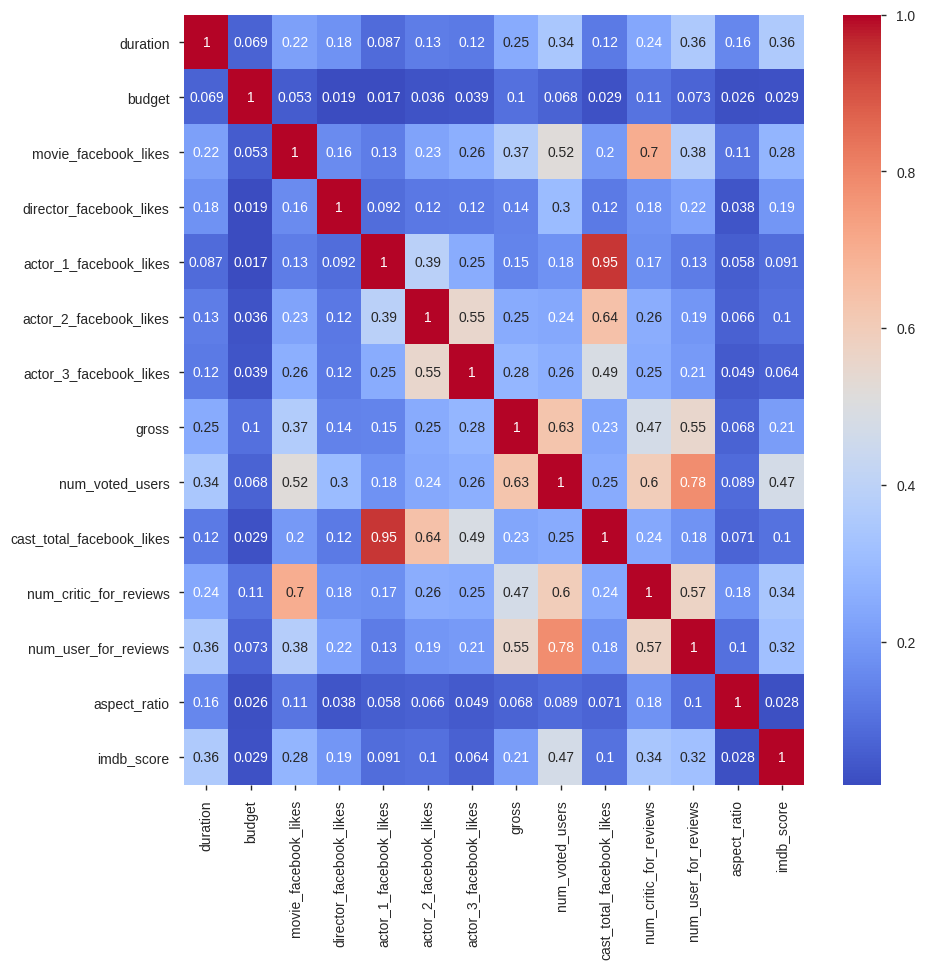

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'),cmap='coolwarm',annot = True)
plt.show();

In [65]:
data.columns

Index(['movie_title', 'title_year', 'duration', 'budget',
       'movie_facebook_likes', 'director_name', 'director_facebook_likes',
       'actor_1_name', 'actor_1_facebook_likes', 'actor_2_name',
       'actor_2_facebook_likes', 'actor_3_name', 'actor_3_facebook_likes',
       'gross', 'genres', 'plot_keywords', 'language', 'country',
       'facenumber_in_poster', 'num_voted_users', 'cast_total_facebook_likes',
       'num_critic_for_reviews', 'movie_imdb_link', 'num_user_for_reviews',
       'content_rating', 'aspect_ratio', 'color', 'imdb_score'],
      dtype='object')

#### **Observations :**
1.   **cast_total_facebook_likes** has strong correlation with Actor 1,2,3 individual facebook likes.
2.   **num_voted_users** have strong correlation with num_user_for_reviews, num_critic_reviews 
3. **num_critic_for_reviews** has strong correlation with num_voted_users and  Movie Facebook likes.

#### **Action :**


1.   As higly correlated features can lead to skewed or misleading results. We will retain only one feature of them.
2. Create New column combining **num_voted_users & num_critic_for_reviews**
3. Delete Actor 1,2,3 individual facebook likes,num_user_for_reviews columns






#### **Take Deep Copy of original data before deleting features**

In [0]:
# Taking deep copy of original data
import copy 
imdb_data = copy.deepcopy(data)

#### **Add combined column for users and critics**


In [0]:
imdb_data['users_and_critics_added'] = imdb_data['num_critic_for_reviews'] +  data['num_voted_users']

#### **Bin movie review in Low,Medium,High based on IMDB ratings**

In [0]:
imdb_data["binned_rating"] = pd.cut(imdb_data.imdb_score, bins= [1,4,7,10],labels=["Low","Medium","High"])

#### **Drop redundant features**

In [120]:
imdb_data.columns

Index(['movie_title', 'title_year', 'duration', 'budget',
       'movie_facebook_likes', 'director_name', 'director_facebook_likes',
       'actor_1_name', 'actor_1_facebook_likes', 'actor_2_name',
       'actor_2_facebook_likes', 'actor_3_name', 'actor_3_facebook_likes',
       'gross', 'genres', 'plot_keywords', 'language', 'country',
       'facenumber_in_poster', 'num_voted_users', 'cast_total_facebook_likes',
       'num_critic_for_reviews', 'movie_imdb_link', 'num_user_for_reviews',
       'content_rating', 'aspect_ratio', 'color', 'imdb_score',
       'users_and_critics_added', 'binned_rating'],
      dtype='object')

In [0]:
# # Identify the columns need to be dropped 
drop_cols = ['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','num_user_for_reviews','num_voted_users','num_critic_for_reviews']
# Drop
imdb_data.drop(drop_cols, axis = 1, inplace = True)

#### **Check Correlation after dropping columns**

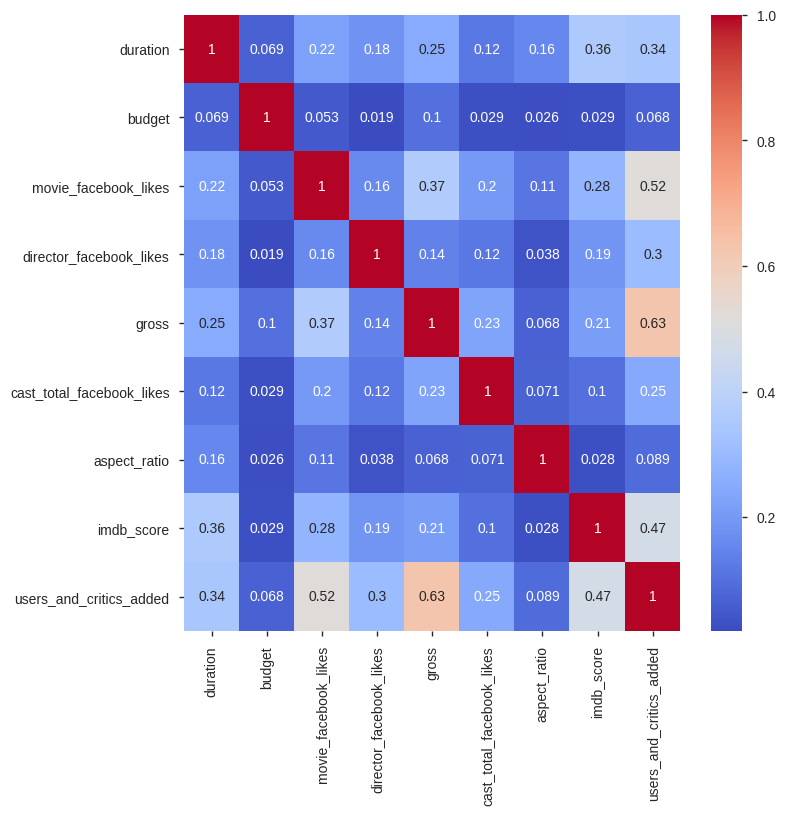

In [122]:
plt.figure(figsize=(8,8))
sns.heatmap(imdb_data.corr(method='pearson'),cmap='coolwarm',annot = True)
plt.show();

#### **Observations**
Multicollinearity reduced after dropping the columns.

### **Featuers analysis through Visualizations**

#### **Box Plots and Outler analysis for important numeric features**

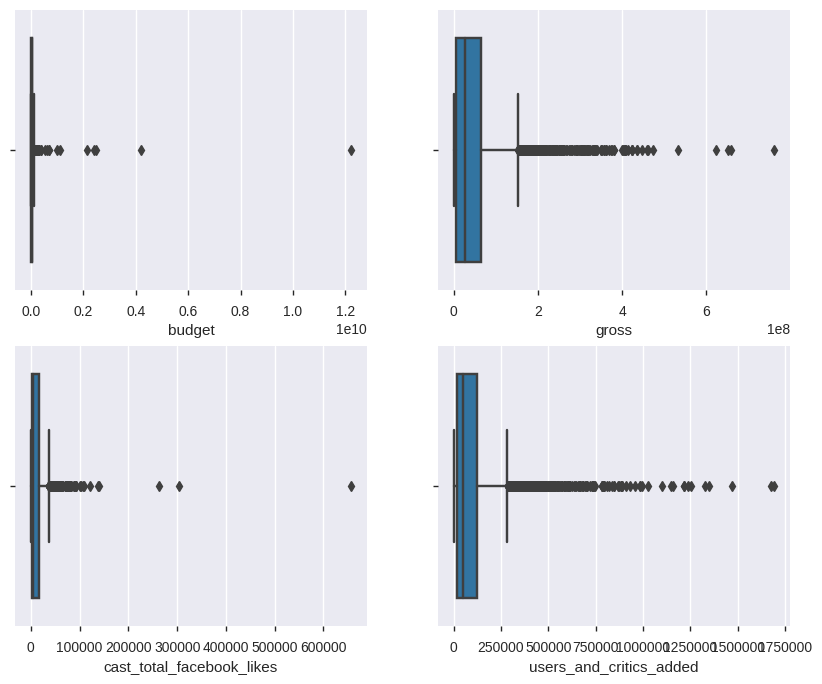

In [123]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 8))
ax = sns.boxplot(x=imdb_data["budget"],ax=axarr[0][0])
ax = sns.boxplot(x=imdb_data["gross"],ax=axarr[0][1])
ax = sns.boxplot(x=imdb_data["cast_total_facebook_likes"],ax=axarr[1][0])
ax = sns.boxplot(x=imdb_data["users_and_critics_added"],ax=axarr[1][1])

#### **Scatter Plot between Budget and Gross**

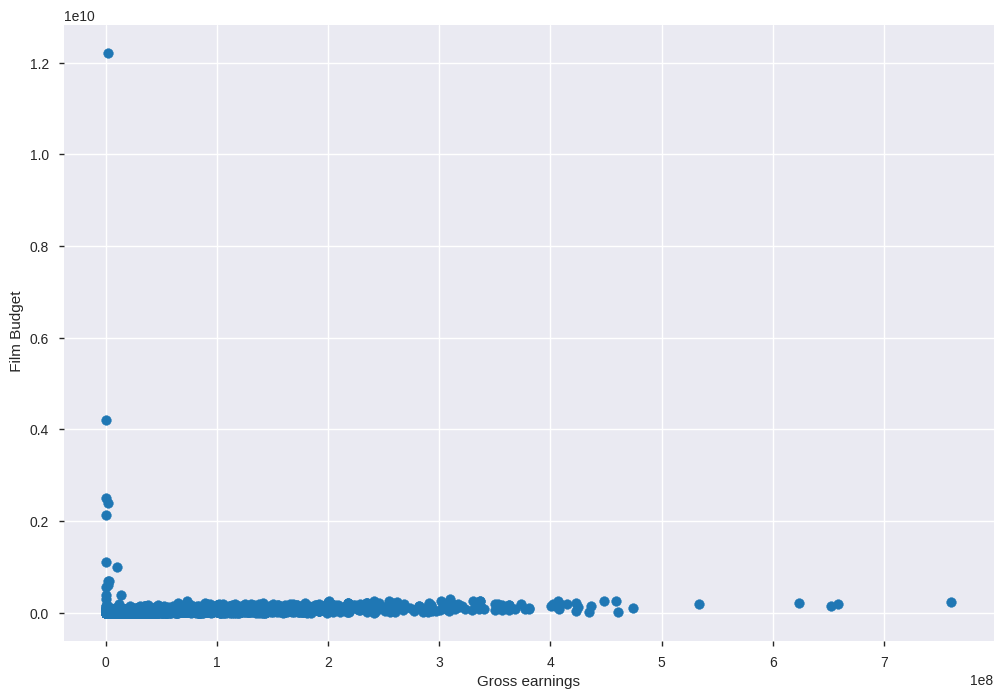

In [124]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(imdb_data['gross'],imdb_data['budget'])
ax.set_xlabel('Gross earnings')
ax.set_ylabel(' Film Budget')

plt.show()

#### **Observations:**
All the numeric features contains outliers

#### **Handling Outliers**

In [125]:
# Get IQR range for all numeric columns

Q1 = imdb_data.quantile(0.25)
Q3 = imdb_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

duration                           25.00
budget                       40000000.00
movie_facebook_likes            11000.00
director_facebook_likes           212.00
gross                        58697414.00
cast_total_facebook_likes       14129.00
aspect_ratio                        0.50
imdb_score                          1.30
users_and_critics_added        106844.25
dtype: float64


In [126]:
Q3

duration                          120.00
budget                       50000000.00
movie_facebook_likes            11000.00
director_facebook_likes           222.00
gross                        65452312.00
cast_total_facebook_likes       15944.00
aspect_ratio                        2.35
imdb_score                          7.20
users_and_critics_added        124168.75
Name: 0.75, dtype: float64

#### **Get upper Whisker threshold values for removing outliers**

In [127]:
upp_whisk = Q3 + (1.5 * IQR) 
round(upp_whisk)

duration                           158.0
budget                       110000000.0
movie_facebook_likes             27500.0
director_facebook_likes            540.0
gross                        153498433.0
cast_total_facebook_likes        37138.0
aspect_ratio                         3.0
imdb_score                           9.0
users_and_critics_added         284435.0
dtype: float64

In [128]:
imdb_data.shape

(3857, 24)

#### **Remove Outliers**

In [0]:
# Remove outliers
imdb_data = imdb_data[imdb_data.budget < 110000000]
imdb_data = imdb_data[imdb_data.gross < 153498433]
imdb_data = imdb_data[imdb_data.cast_total_facebook_likes < 37138]
imdb_data = imdb_data[imdb_data.users_and_critics_added < 284435]


In [135]:
imdb_data.shape

(2957, 24)

In [136]:
((3857-2957)/3857)*100

23.3341975628727

##### **Note : 23 % out of remaining data clipped in outlier removal**


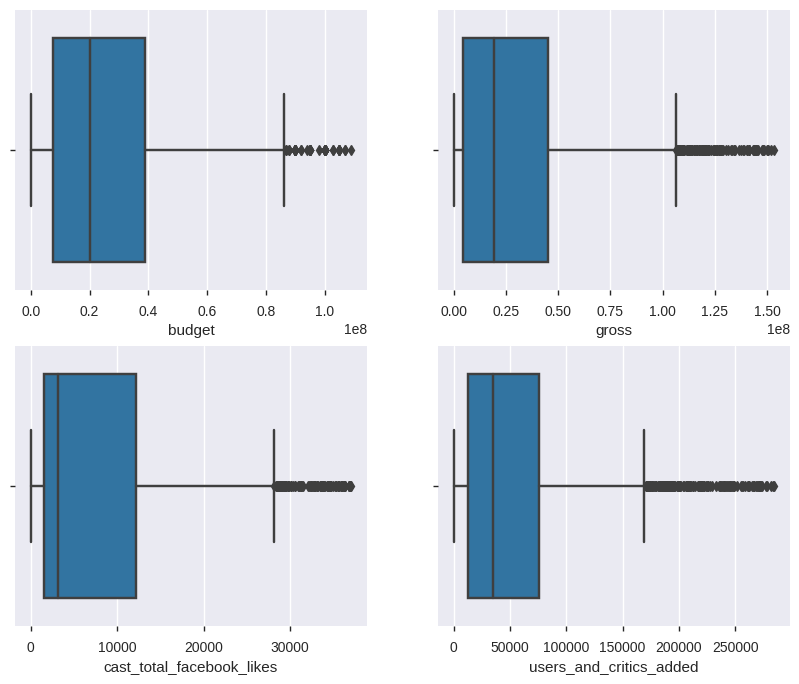

In [137]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8))
ax = sns.boxplot(x=imdb_data["budget"],ax=axarr[0][0])
ax = sns.boxplot(x=imdb_data["gross"],ax=axarr[0][1])
ax = sns.boxplot(x=imdb_data["cast_total_facebook_likes"],ax=axarr[1][0])
ax = sns.boxplot(x=imdb_data["users_and_critics_added"],ax=axarr[1][1])

#### **Missing Values and Imputation** 

In [138]:
missing_values_table(imdb_data)

Your selected dataframe has 2957 rows and 24 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
aspect_ratio,71,2.4
content_rating,47,1.6
plot_keywords,30,1.0
actor_3_name,9,0.3
actor_2_name,5,0.2
facenumber_in_poster,4,0.1
actor_1_name,3,0.1
language,3,0.1
color,2,0.1
duration,1,0.0


#### **Aspect ratio feature analysis**

In [139]:
imdb_data['aspect_ratio'].mean()

2.090232155232218

In [0]:
imdb_data['aspect_ratio'].fillna(0.0, inplace=True)

In [141]:
imdb_data['aspect_ratio'].mean()

2.0400439634765575

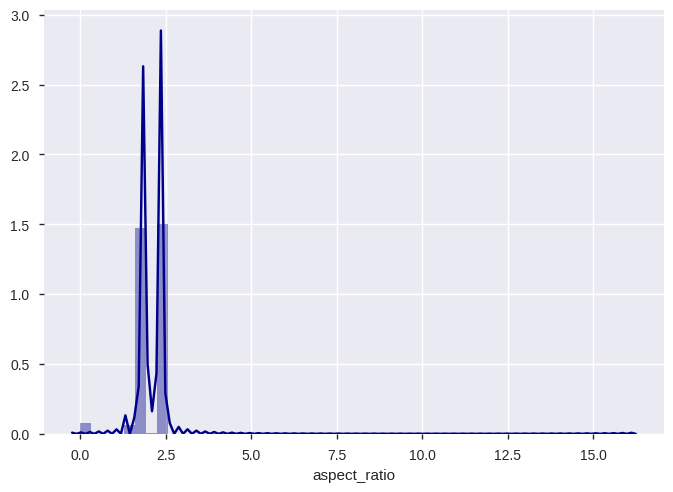

In [142]:
sns.distplot(imdb_data.aspect_ratio,color = 'darkblue')

#### **Observation**
As there is no significant change in Aspect ratio distribution and  mean before and after imputing missing values with 0. so we can **drop aspect ratio** feature

#### **'Color' feature analysis**

####  **Frequency plot for the 'color' feature**

In [0]:
imdb_data.color = imdb_data.color.fillna(value='Color')

In [144]:

imdb_data.color.isnull().sum()

0

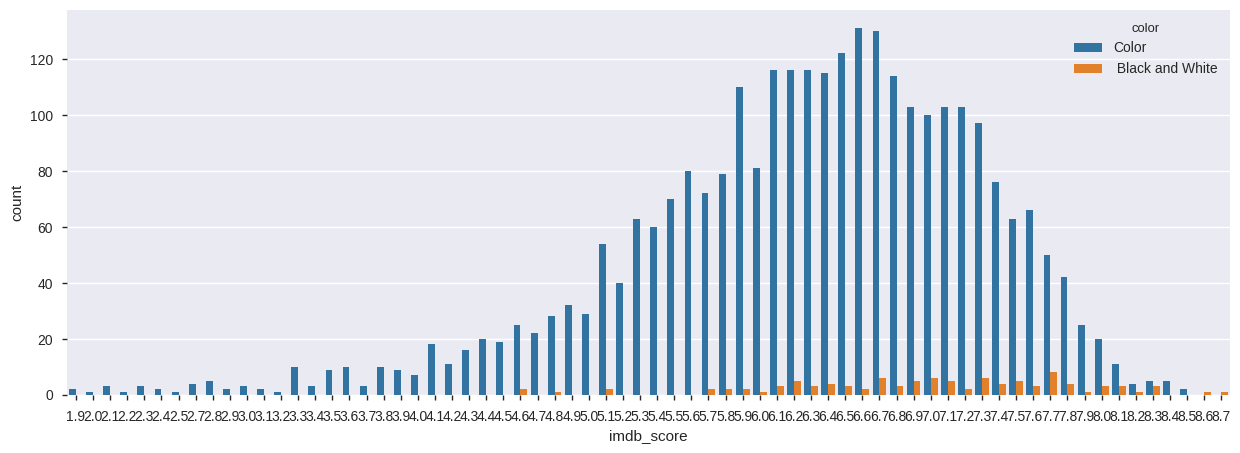

In [145]:
plt.figure(figsize=(15,5))
sns.countplot(x='imdb_score', hue = 'color',data = imdb_data)

In [146]:
imdb_data.color.value_counts()

Color               2855
 Black and White     102
Name: color, dtype: int64

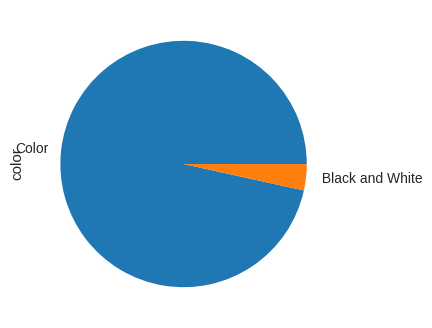

In [147]:
plt.figure(figsize=(4,4))
imdb_data.color.value_counts().plot(kind= 'pie')

#### **Observation**
As 'Black and white' category has very less count compared to the 'Color' movies, this feature has no contribution in predicting the target. Hence we can **Drop 'color'** feature. 

#### **'Genre' feature analysis**

#### **Create new feature containing Genre counts per movie**

In [0]:
imdb_data['genre_Count'] = imdb_data['genres'].str.split('|').str.len()

#### **Genres_count distribution**

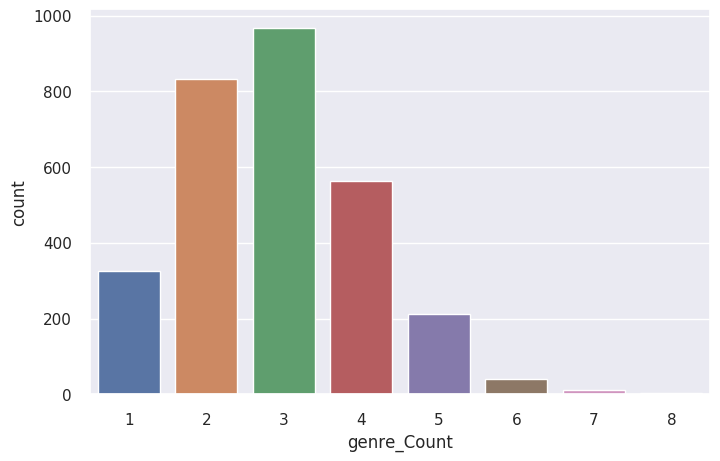

In [150]:
plt.figure(figsize=(8,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="genre_Count", data=imdb_data)

#### **Observation**

Maximum movies have 2 to 4 genre types.

#### **Binned Movie rating count plot**

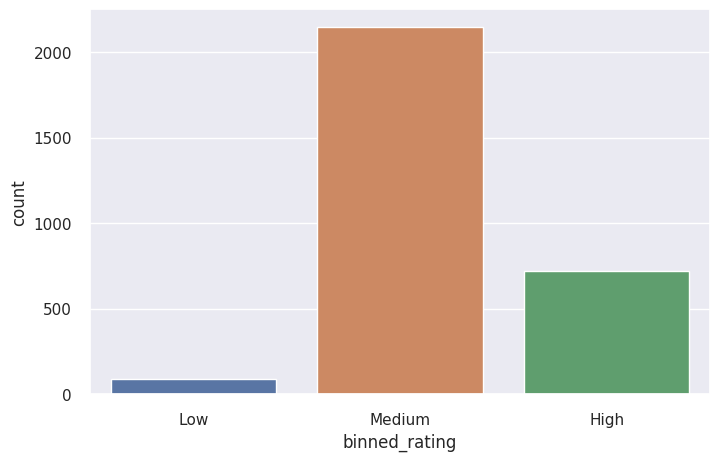

In [151]:
plt.figure(figsize=(8,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="binned_rating", data=imdb_data)

#### **Genres count plot with respect to the IMDB score**

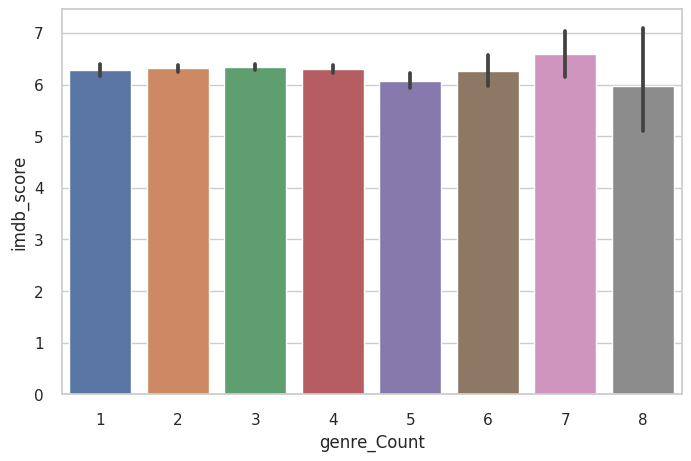

In [152]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
ax = sns.barplot(x="genre_Count", y="imdb_score", data=imdb_data)

#### **Observation**
More Genres count does not ensure the high IMDB score. 


#### **Analyze 'language' and 'country' columns**

In [0]:
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'English'),
 Text(0, 0, 'Mandarin'),
 Text(0, 0, 'Aboriginal'),
 Text(0, 0, 'Spanish'),
 Text(0, 0, 'French'),
 Text(0, 0, 'Filipino'),
 Text(0, 0, 'Maya'),
 Text(0, 0, 'Kazakh'),
 Text(0, 0, 'Telugu'),
 Text(0, 0, 'Cantonese'),
 Text(0, 0, 'Japanese'),
 Text(0, 0, 'Aramaic'),
 Text(0, 0, 'Italian'),
 Text(0, 0, 'Dutch'),
 Text(0, 0, 'Dari'),
 Text(0, 0, 'German'),
 Text(0, 0, 'Mongolian'),
 Text(0, 0, 'Bosnian'),
 Text(0, 0, 'Korean'),
 Text(0, 0, 'Icelandic'),
 Text(0, 0, 'Hindi'),
 Text(0, 0, 'Danish'),
 Text(0, 0, 'Portuguese'),
 Text(0, 0, 'Norwegian'),
 Text(0, 0, 'Czech'),
 Text(0, 0, 'Russian'),
 Text(0, 0, 'None'),
 Text(0, 0, 'Zulu'),
 Text(0, 0, 'Hebrew'),
 Text(0, 0, 'Dzongkha'),
 Text(0, 0, 'Arabic'),
 Text(0, 0, 'Vietnamese'),
 Text(0, 0, 'Indonesian'),
 Text(0, 0, 'Romanian'),
 Text(0, 0, 'Swedish'),
 Text(0, 0, 'Persian')]

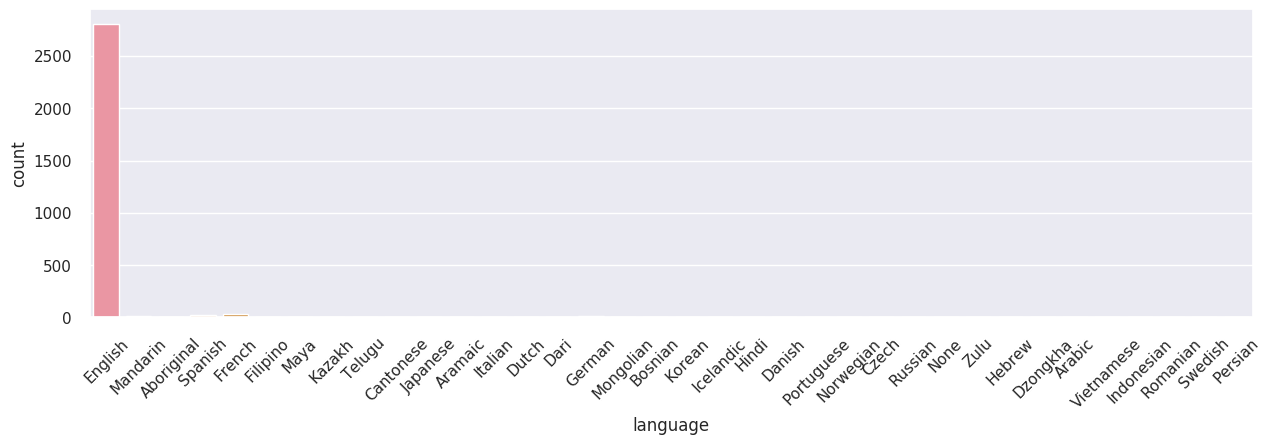

In [158]:
plt.figure(figsize=(15,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="language", data=imdb_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'USA'),
 Text(0, 0, 'New Line'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'France'),
 Text(0, 0, 'China'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Hong Kong'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'Peru'),
 Text(0, 0, 'New Zealand'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Aruba'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Ireland'),
 Text(0, 0, 'South Korea'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Romania'),
 Text(0, 0, 'Chile'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Hungary'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Russia'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Taiwan'),
 Text(0, 0, 'Official site'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'West Germany'),
 Text(0, 0, 'Georgia'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Colombia'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'South

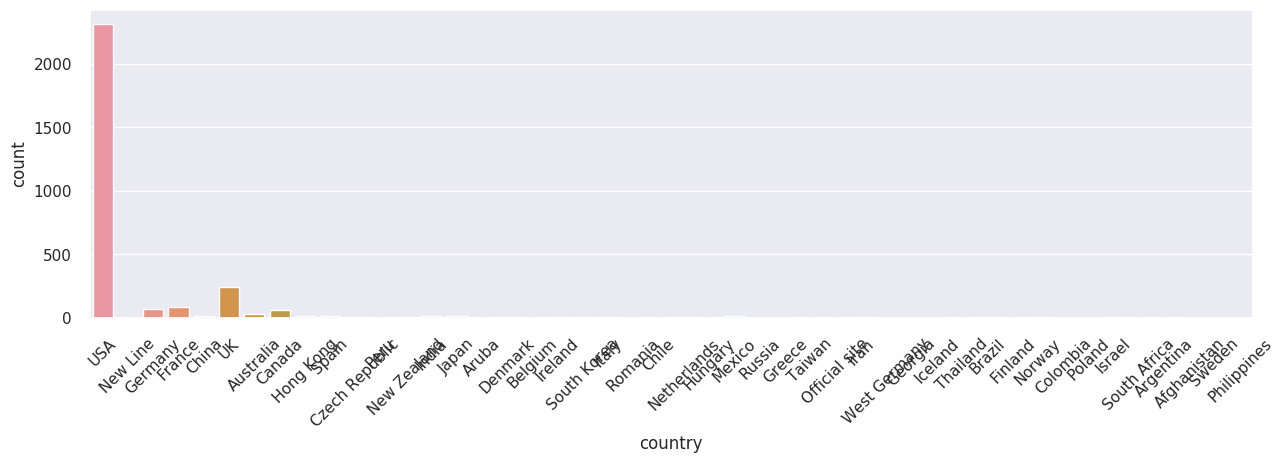

In [159]:
plt.figure(figsize=(15,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="country", data=imdb_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

#### **Observation**

As English language and USA and UK countries has maximum observations.. These variables are not significant for predicting the IMDB score. 

#### **IMDB score distribution**

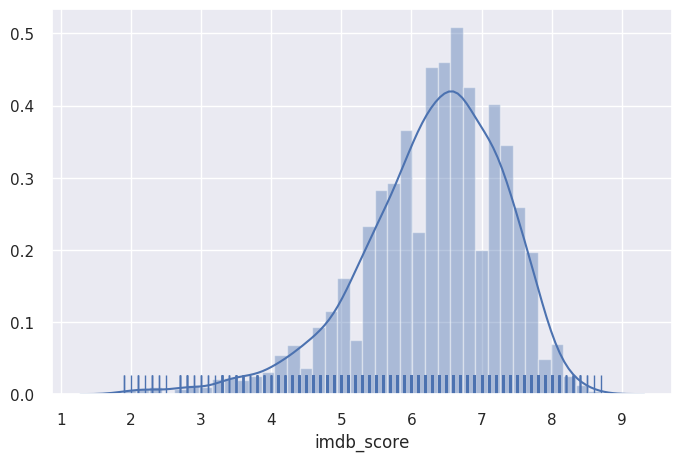

In [160]:
plt.figure(figsize=(8,5))
ax = sns.distplot(imdb_data.imdb_score, rug=True, hist=True)

#### **Observation**

IMDB score is normally distributed with mean around 6.5 and by empirical rule, **95 % of movies** fall under IMDB score of 4 to 8  

#### **Gross and Budget analysis over years**

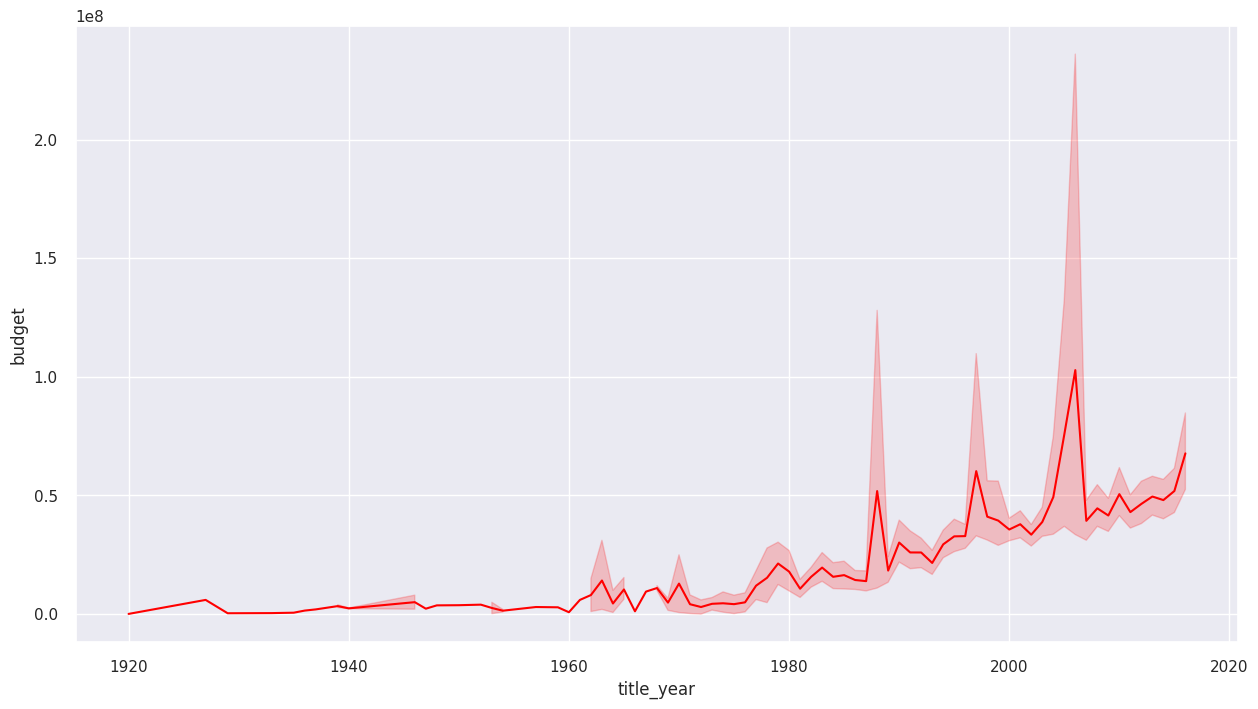

In [161]:
plt.figure(figsize=(15,8))  

ax = sns.lineplot(x="title_year", y="budget", data=data,color = 'red')

#### **Observation**
Budget of the movies has increased since 1990's 

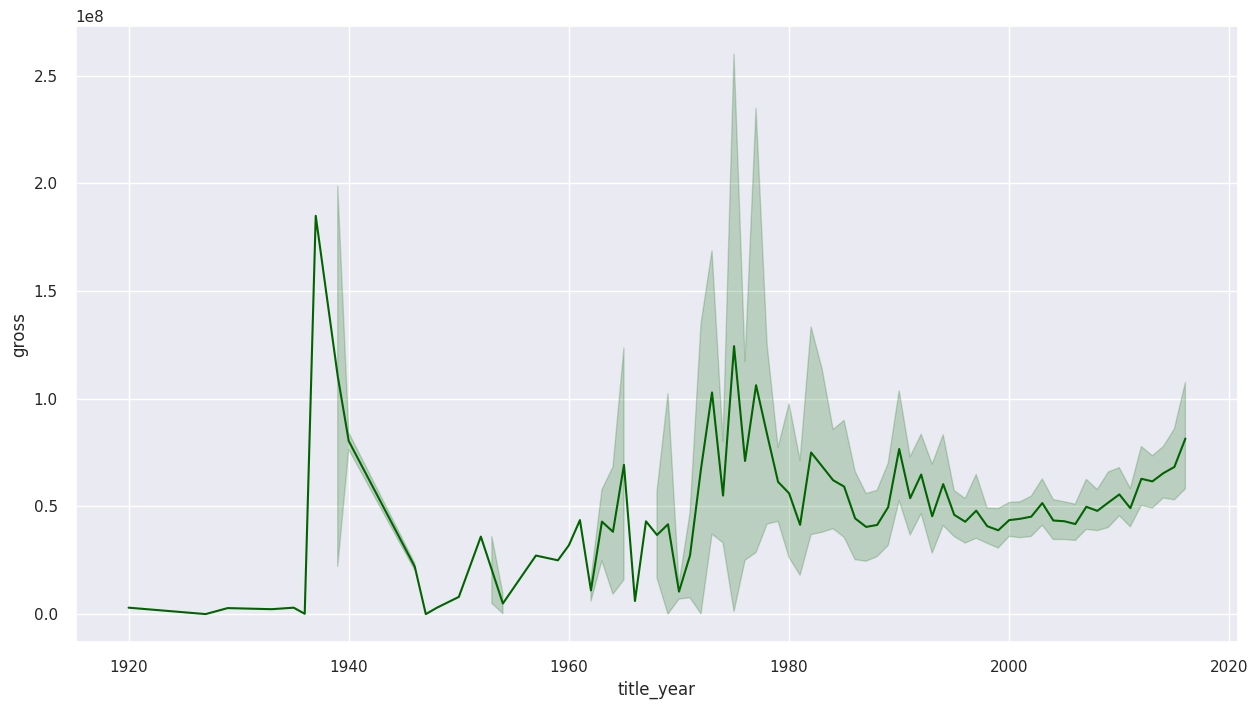

In [162]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x="title_year", y="gross", data=data,color = 'darkgreen')

#### **Observation**
Gross earning of the movies dropped between 80's and 90's. It's increasing steadily since 1990's 

#### **Create new column '% profit' based on gross and budget** 


In [0]:
imdb_data['% profit'] = round(((imdb_data['gross'] - imdb_data['budget'])/imdb_data['budget'])*100)

In [0]:
data['% profit'] = round(((data['gross'] - data['budget'])/data['budget'])*100)

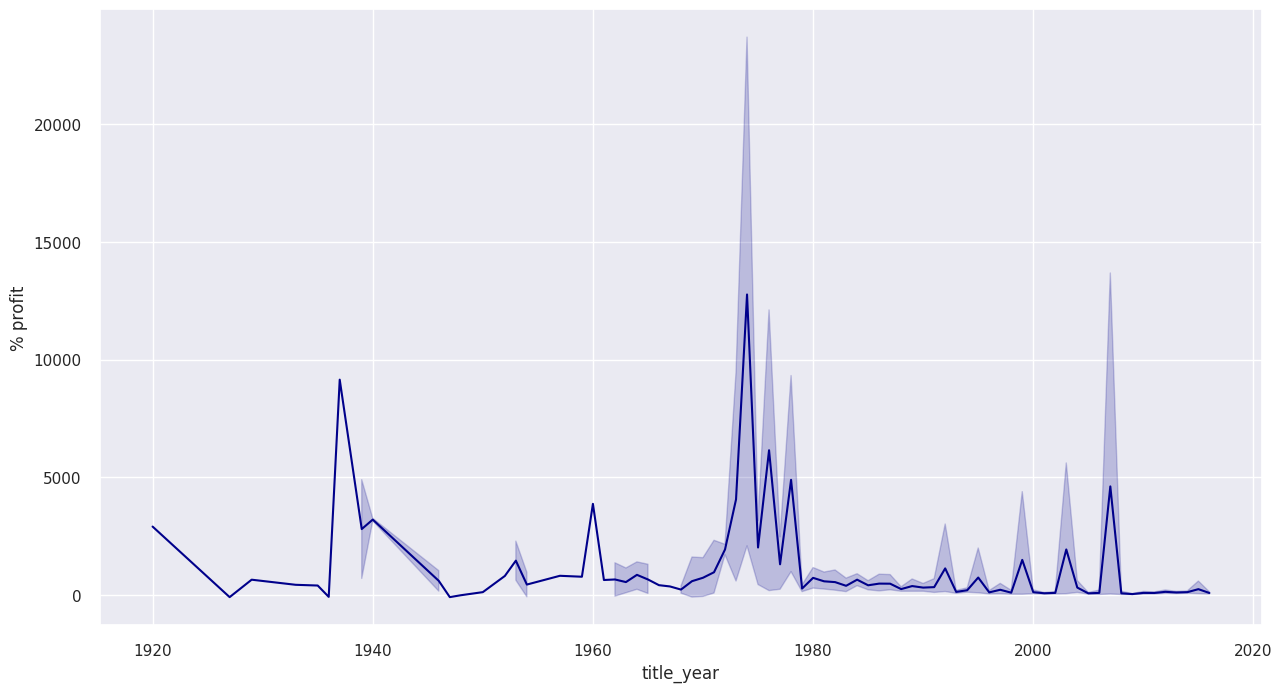

In [165]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x="title_year", y="% profit", data=data,color = 'darkblue')

#### **Creating new feature to split the genres and plot keywords into tokens**

In [168]:
imdb_data.tail(2)

,movie_title,title_year,duration,budget,movie_facebook_likes,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,gross,genres,plot_keywords,language,country,facenumber_in_poster,cast_total_facebook_likes,movie_imdb_link,content_rating,aspect_ratio,color,imdb_score,users_and_critics_added,binned_rating,genre_Count,% profit,token_genres,token_plot_keywords
5037,Newlyweds,2011.0,95.0,9000.0,413,Edward Burns,0.0,Kerry Bishé,Caitlin FitzGerald,Daniella Pineda,4584.0,Comedy|Drama,written and directed by cast member,English,USA,1.0,690,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,Not Rated,0.00,Color,6.4,1352.0,Medium,2,-49.0,"[Comedy, Drama]",[written and directed by cast member]
5042,My Date with Drew,2004.0,90.0,1100.0,456,Jon Gunn,16.0,John August,Brian Herzlinger,Jon Gunn,85222.0,Documentary,actress name in title|crush|date|four word tit...,English,USA,0.0,163,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,PG,1.85,Color,6.6,4328.0,Medium,1,7647.0,[Documentary],"[actress name in title, crush, date, four word..."


#### **Try word clouds**

In [0]:
# Below function collects the keywords based on the given condition from corpus and gives wordcloud plot

from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

#### **Low rated movies**

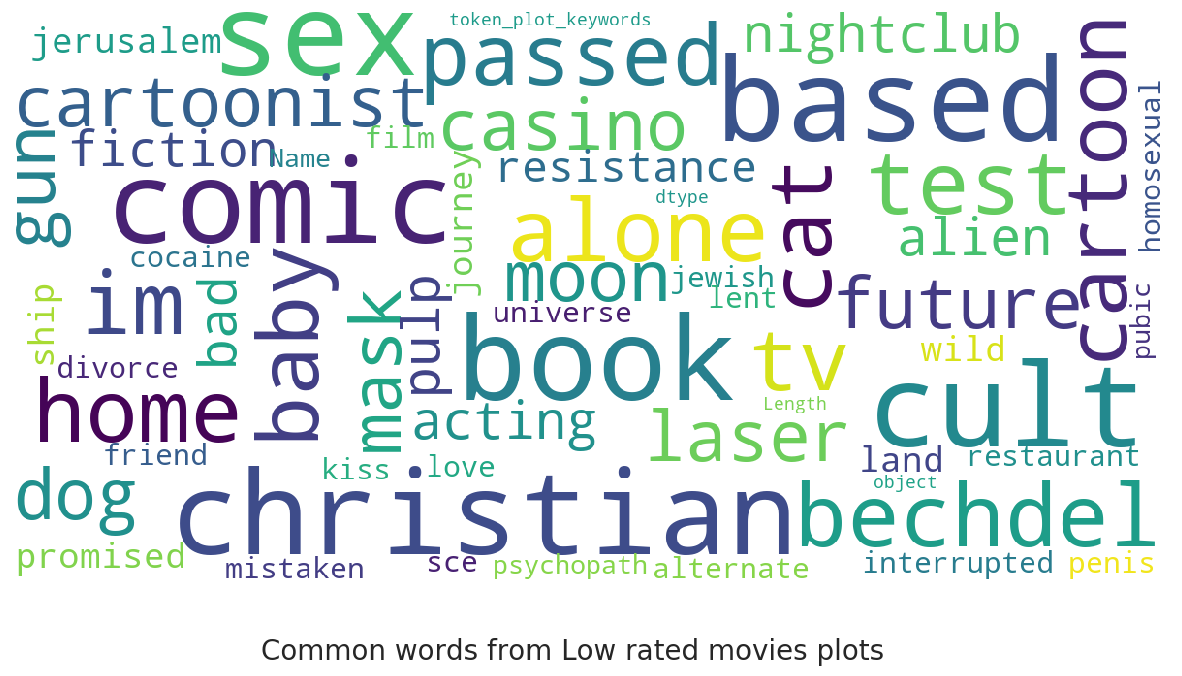

In [171]:
show_wordcloud(imdb_data[imdb_data['binned_rating'] == 'Low']['token_plot_keywords'],'Common words from Low rated movies plots')

#### **Medium rated movies**

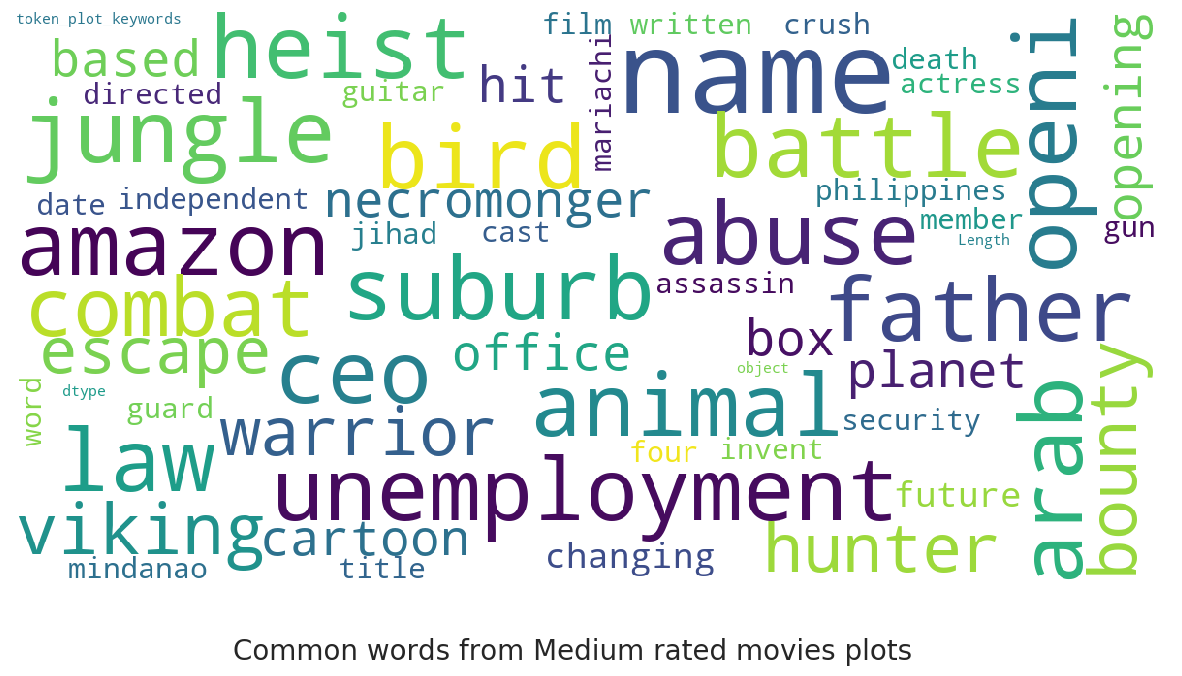

In [174]:
show_wordcloud(imdb_data[imdb_data['binned_rating'] == 'Medium']['token_plot_keywords'],'Common words from Medium rated movies plots')

#### **High rated movies**

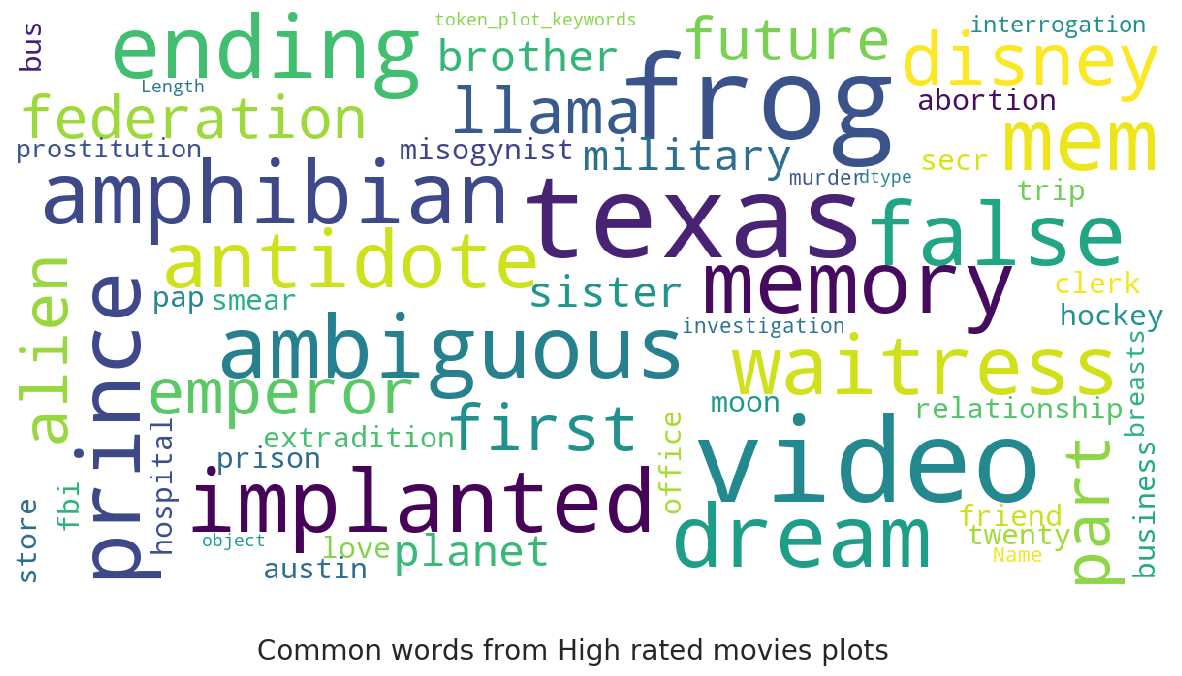

In [173]:
show_wordcloud(imdb_data[imdb_data['binned_rating'] == 'High']['token_plot_keywords'],'Common words from High rated movies plots')

#### **Drop Redundant columns**

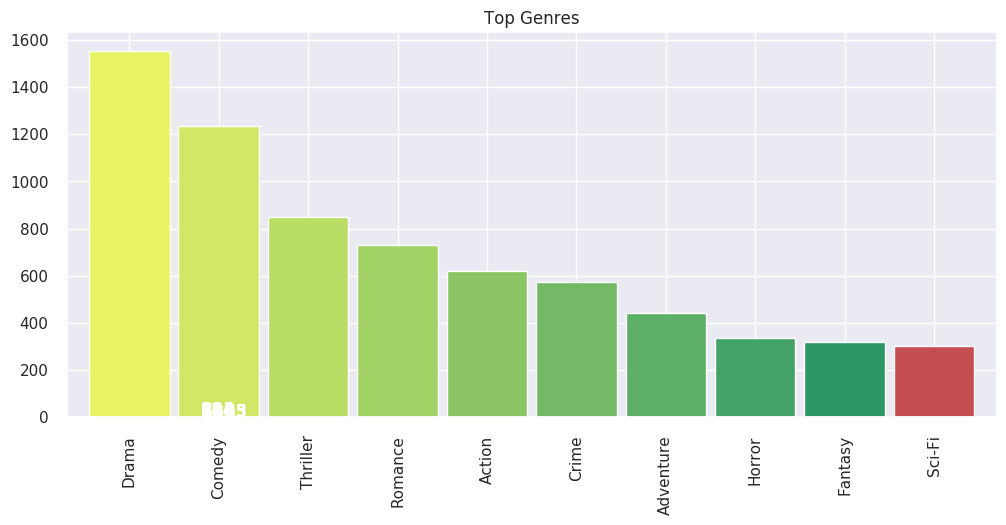

In [186]:
# Below code iterated overt the token_generes lists from each observation to take count of each genre

plt.subplots(figsize=(12,5))
list1=[]
for i in imdb_data['token_genres']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:10].sort_values(ascending=False).plot.bar(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=False).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()

In [187]:
imdb_data.head(1)

,movie_title,title_year,duration,budget,movie_facebook_likes,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,gross,genres,plot_keywords,language,country,facenumber_in_poster,cast_total_facebook_likes,movie_imdb_link,content_rating,aspect_ratio,color,imdb_score,users_and_critics_added,binned_rating,genre_Count,% profit,token_genres,token_plot_keywords
157,Fun with Dick and Jane,2005.0,90.0,100000000.0,2000,Dean Parisot,23.0,John Michael Higgins,Richard Burgi,David Herman,110332737.0,Comedy|Crime,animal abuse|ceo|heist|suburb|unemployment,English,USA,1.0,1997,http://www.imdb.com/title/tt0369441/?ref_=fn_t...,PG-13,2.35,Color,6.1,110923.0,Medium,2,10.0,"[Comedy, Crime]","[animal abuse, ceo, heist, suburb, unemployment]"


#### **Combine all actors and directors in same column**

In [0]:
imdb_data['actorDirector_combined']= imdb_data['actor_1_name']+imdb_data['actor_2_name']+imdb_data['actor_3_name']+imdb_data['director_name']

In [0]:
imdb_data.drop(['actor_1_name','actor_2_name','actor_3_name','director_name'], axis = 1, inplace = True)
#imdb_data.drop(['plot_keywords','language','country','movie_imdb_link','content_rating','aspect_ratio','color'], axis = 1, inplace = True)

In [195]:
imdb_data.columns

Index(['movie_title', 'title_year', 'duration', 'budget',
       'movie_facebook_likes', 'director_facebook_likes', 'gross', 'genres',
       'facenumber_in_poster', 'cast_total_facebook_likes',
       'users_and_critics_added', 'binned_rating', 'genre_Count', '% profit',
       'token_genres', 'token_plot_keywords', 'imdb_score',
       'actorDirector_combined'],
      dtype='object')

In [0]:
# Rearrang eolumns 
imdb_data = imdb_data[['movie_title', 'title_year', 'duration', 'budget',
       'movie_facebook_likes', 'director_facebook_likes', 'gross', 'genres',
       'facenumber_in_poster', 'cast_total_facebook_likes',
       'users_and_critics_added', 'binned_rating', 'genre_Count', '% profit',
       'token_genres', 'token_plot_keywords',
       'actorDirector_combined','imdb_score']]

#### **Impute remaining columns**

In [197]:
missing_values_table(imdb_data)

Your selected dataframe has 2957 rows and 18 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
token_plot_keywords,30,1.0
actorDirector_combined,9,0.3
facenumber_in_poster,4,0.1
duration,1,0.0


In [0]:
imdb_data['token_plot_keywords'].fillna(' ', inplace=True)                                          # Replace NA ny blank Space and no token present
imdb_data['actorDirector_combined'].fillna( ' ', inplace=True)                                             # Replace NA ny blank Space and no token present
imdb_data['facenumber_in_poster'].fillna(imdb_data['facenumber_in_poster'].mode()[0], inplace=True) # Replace categorical values by mode
imdb_data['duration'].fillna((imdb_data['duration'].mean()), inplace=True)                          # Replace NAs by mean 

In [200]:
missing_values_table(imdb_data)

Your selected dataframe has 2957 rows and 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### **Clean Movie Title and other string datatypes data**

In [0]:
import re
import nltk
import random
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [202]:
imdb_data.head(1)

,movie_title,title_year,duration,budget,movie_facebook_likes,director_facebook_likes,gross,genres,facenumber_in_poster,cast_total_facebook_likes,users_and_critics_added,binned_rating,genre_Count,% profit,token_genres,token_plot_keywords,actorDirector_combined,imdb_score
157,Fun with Dick and Jane,2005.0,90.0,100000000.0,2000,23.0,110332737.0,Comedy|Crime,1.0,1997,110923.0,Medium,2,10.0,"[Comedy, Crime]","[animal abuse, ceo, heist, suburb, unemployment]",John Michael HigginsRichard BurgiDavid HermanD...,6.1


### **Split Data into Train and Validate**

In [247]:
train_x,val_x,train_y,val_y = train_test_split(imdb_data.iloc[:,:-1],imdb_data.iloc[:,-1],test_size=0.3,random_state=1)
print(imdb_data.shape)
print(train_x.shape)
print(val_x.shape)

(2957, 18)
(2069, 17)
(888, 17)


#### **Separate Numerical, categorical columns and string columns**

In [0]:
  cat_cols = ['binned_rating']
  string_cols = ['movie_title','token_genres','token_plot_keywords','actorDirector_combined']
  num_cols = ['duration','budget','movie_facebook_likes','director_facebook_likes','gross','cast_total_facebook_likes','users_and_critics_added','genre_Count','% profit']

In [0]:
train_num_data = train_x.loc[:,num_cols]

val_num_data = val_x.loc[:,num_cols]


#### **Standardize numerical columns**

In [0]:
standardizer = StandardScaler()
standardizer.fit(train_num_data)
train_num_data = pd.DataFrame(standardizer.transform(train_num_data),columns=num_cols)

In [0]:
# perform same steps on validation 
standardizer.fit(val_num_data)
val_num_data = pd.DataFrame(standardizer.transform(val_num_data),columns=num_cols)

In [305]:
train_num_data.head(2)

,duration,budget,movie_facebook_likes,director_facebook_likes,gross,cast_total_facebook_likes,users_and_critics_added,genre_Count,% profit
0,0.600869,-0.732717,-0.460449,-0.080015,-0.787042,-0.463721,-0.560823,0.083536,-0.063947
1,-1.055220,2.270560,-0.460449,-0.108536,3.616169,-0.483108,1.186670,3.455962,-0.047835


In [256]:
print(train_num_data.shape)
print(train_x.shape)

(2069, 9)
(2069, 17)


#### **Perform One Hot Encoding for genres column and merge with original data**

In [257]:
## Casting genres for the train data
casted_genres = train_x['genres'].str.get_dummies(sep='|')
casted_genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
3343,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
443,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1788,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1376,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2167,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [258]:
casted_genres.shape

(2069, 22)

In [264]:
## Casting genres for validation data
val_casted_genres = val_x['genres'].str.get_dummies(sep='|')
val_casted_genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
1418,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1791,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1995,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2419,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2546,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0


#### **Reset index before concatination**

In [0]:
casted_genres.reset_index(drop=True, inplace=True)

In [0]:
val_casted_genres.reset_index(drop=True, inplace=True)

In [0]:
final = train_num_data.join(casted_genres)
train_x = final

In [0]:
val_x = val_num_data.join(val_casted_genres)

In [272]:
val_x.drop(['Film-Noir'], axis = 1, inplace = True)
val_x.head(2)

,duration,budget,movie_facebook_likes,director_facebook_likes,gross,cast_total_facebook_likes,users_and_critics_added,genre_Count,% profit,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,-0.793068,0.395363,-0.459426,-0.234529,1.022030,1.898412,-0.417602,-1.601273,-0.036898,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.137549,0.045673,-0.459426,-0.213831,-0.885932,-0.754188,0.080635,0.108806,-0.044020,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [271]:
train_x.head(2)

,duration,budget,movie_facebook_likes,director_facebook_likes,gross,cast_total_facebook_likes,users_and_critics_added,genre_Count,% profit,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0.600869,-0.732717,-0.460449,-0.080015,-0.787042,-0.463721,-0.560823,0.083536,-0.063947,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-1.055220,2.270560,-0.460449,-0.108536,3.616169,-0.483108,1.186670,3.455962,-0.047835,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0


In [273]:
print(val_x.shape)
print(train_x.shape)

(888, 31)
(2069, 31)


### **Model Building**

#### **Linear Regression without 'Genre' feature**

In [0]:
 lnr = LinearRegression()
 lnr.fit(train_num_data,train_y)
 pred_train = lnr.predict(train_num_data)
 pred_val = lnr.predict(val_num_data)
 train_mae=mean_absolute_error(train_y,pred_train)
 val_mae=mean_absolute_error(val_y,pred_val)
 MSE=mean_squared_error(val_y,pred_val)
 MSE_train=mean_squared_error(train_y,pred_train)
 r_sq=r2_score(val_y,pred_val)

In [345]:
  print('Train MeanAbsError:', train_mae )
  print('Validation MeanAbsError:', val_mae )
  print('Train MSE:', MSE_train )
  print('Validation MSE:', MSE )
  print('Validation Rsquared', r_sq )

Train MeanAbsError: 0.6536848078601006
Validation MeanAbsError: 0.6430170403218493
Train MSE: 0.7549592136768009
Validation MSE: 0.7438812338066553
Validation Rsquared 0.2761021525205736


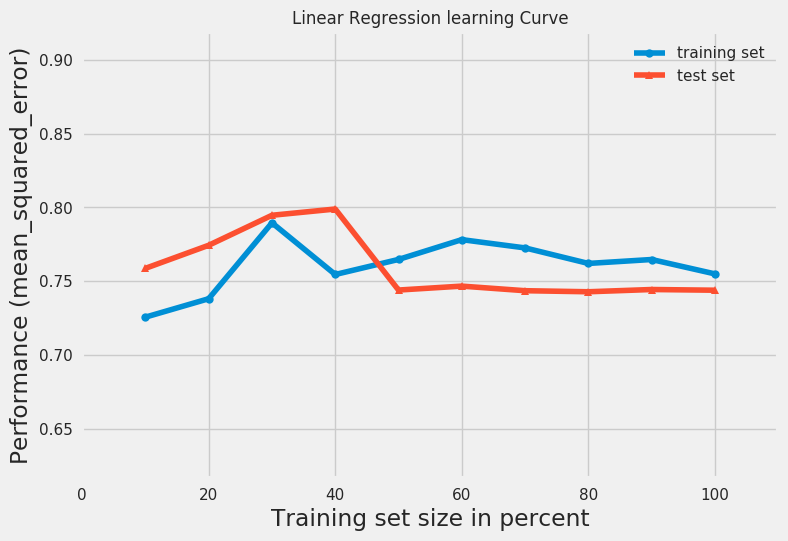

In [346]:
plot_learning_curves(train_num_data, train_y, val_num_data, val_y,lnr,scoring='mean_squared_error')
plt.title('Linear Regression learning Curve')
plt.show()

#### **Linear Regression with 'Genre' feature**

In [0]:
 lnr = LinearRegression()
 lnr.fit(train_x,train_y)
 pred_train = lnr.predict(train_x)
 pred_val = lnr.predict(val_x)
 train_mae=mean_absolute_error(train_y,pred_train)
 val_mae=mean_absolute_error(val_y,pred_val)
 MSE=mean_squared_error(val_y,pred_val)
 MSE_train=mean_squared_error(train_y,pred_train)
 r_sq=r2_score(val_y,pred_val)

In [297]:
  print('Train MeanAbsError:', train_mae )
  print('Validation MeanAbsError:', val_mae )
  print('Train MSE:', MSE_train )
  print('Validation MSE:', MSE )
  print('Validation Rsquared', r_sq )
  
  #print(mean_absolute_error(y_validation,pred_val))

Train MeanAbsError: 0.5704528911135195
Validation MeanAbsError: 0.5875198993717369
Train MSE: 0.5934716646619443
Validation MSE: 0.6198344986262553
Validation Rsquared 0.39681653608476686


In [0]:
import mlxtend
from mlxtend.plotting import plot_learning_curves

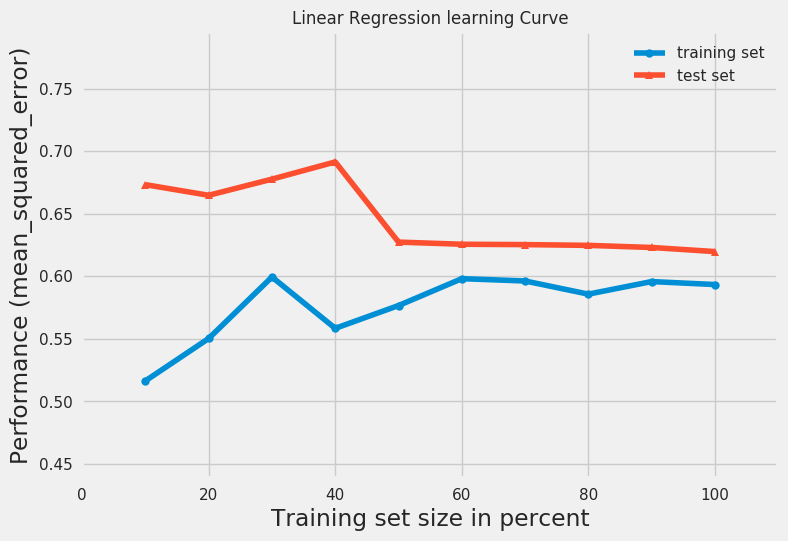

In [295]:
plot_learning_curves(train_x, train_y, val_x, val_y,lnr,scoring='mean_squared_error')
plt.title('Linear Regression learning Curve')
plt.show()

#### **Observation**

Train and Validation errors are decresing gradually and Linear Regression model is fitting good .

#### **Decision Tree regressor without 'Ganre' feature'**

In [339]:
dtc = DecisionTreeRegressor()
param_grid = {"max_depth" : [5,6,8,10,12,13,15,16],'max_features':['log2','sqrt']}

dtc_cv_grid = GridSearchCV(estimator = dtc, param_grid = param_grid,
                                        scoring ="neg_mean_squared_error")
dtc_cv_grid.fit(train_num_data,train_y)
dtc_cv_grid.best_estimator_.fit(train_num_data, train_y)
pred_train = dtc_cv_grid.best_estimator_.predict(train_num_data)
pred_val = dtc_cv_grid.best_estimator_.predict(val_num_data)
print("Best Decision Tree Param : ",dtc_cv_grid.best_estimator_)
    
train_mae=mean_absolute_error(train_y,pred_train)
val_mae=mean_absolute_error(val_y,pred_val)
MSE=mean_squared_error(val_y,pred_val)
MSE_train=mean_squared_error(train_y,pred_train)
r_sq=r2_score(val_y,pred_val)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Decision Tree Param :  DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='log2',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [340]:
  print('Train MeanAbsError:', train_mae )
  print('Validation MeanAbsError:', val_mae )
  print('Train MSE:', MSE_train )
  print('Validation MSE:', MSE )
  print('Validation Rsquared', r_sq )

Train MeanAbsError: 0.6035653455254065
Validation MeanAbsError: 0.6778800677098046
Train MSE: 0.6497685714384819
Validation MSE: 0.808528550419536
Validation Rsquared 0.21319150063881254


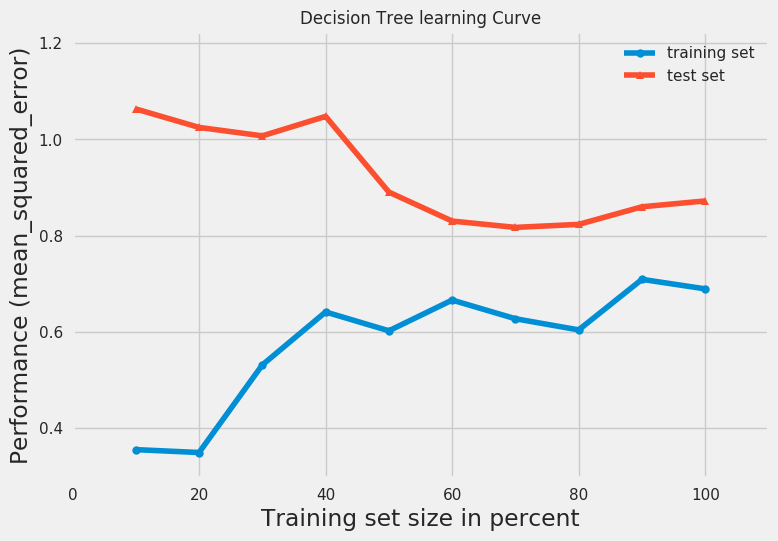

In [343]:
plot_learning_curves(train_num_data, train_y, val_num_data, val_y,dtc_cv_grid.best_estimator_,scoring='mean_squared_error')
plt.title('Decision Tree learning Curve')
plt.show()

#### **Decison Tree Regressor with Genre**

In [298]:
dtc = DecisionTreeRegressor()

param_grid = {"max_depth" : [5,6,8,10,12,13,15,16],'max_features':['log2','sqrt']}

dtc_cv_grid = GridSearchCV(estimator = dtc, param_grid = param_grid,
                                        scoring ="neg_mean_squared_error")
dtc_cv_grid.fit(train_x,train_y)
dtc_cv_grid.best_estimator_.fit(train_x, train_y)
pred_train = dtc_cv_grid.best_estimator_.predict(train_x)
pred_val = dtc_cv_grid.best_estimator_.predict(val_x)
print("Best Decision Tree Param : ",dtc_cv_grid.best_estimator_)
#pred_test=dtc.predict(test_data)
#print(mean_absolute_error(y_train,pred_train))
#print(mean_absolute_error(y_validation,pred_val))        
train_mae=mean_absolute_error(train_y,pred_train)
val_mae=mean_absolute_error(val_y,pred_val)
MSE=mean_squared_error(val_y,pred_val)
MSE_train=mean_squared_error(train_y,pred_train)
r_sq=r2_score(val_y,pred_val)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Decision Tree Param :  DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='sqrt',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [299]:
  print('Train MeanAbsError:', train_mae )
  print('Validation MeanAbsError:', val_mae )
  print('Train MSE:', MSE_train )
  print('Validation MSE:', MSE )
  print('Validation Rsquared', r_sq )

Train MeanAbsError: 0.6353503654767543
Validation MeanAbsError: 0.6637749954092397
Train MSE: 0.7130350859836218
Validation MSE: 0.7673918759641929
Validation Rsquared 0.2532230926959186


##### **Decision Tree Learning Curve**

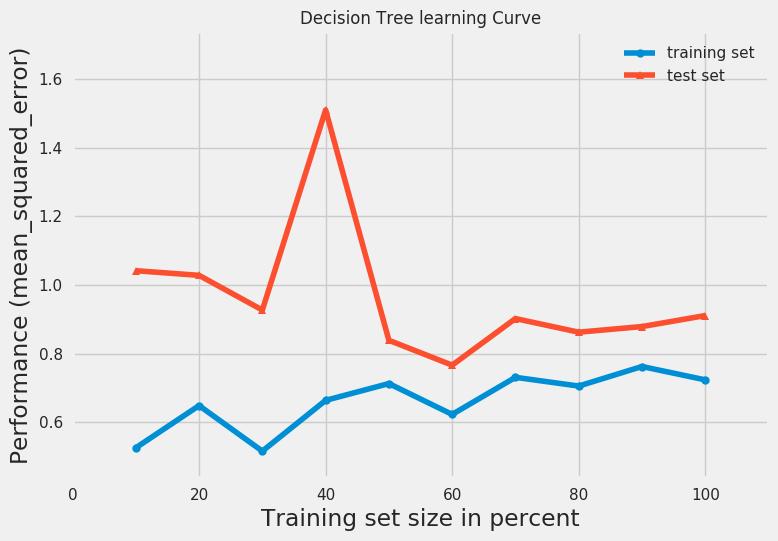

In [292]:
plot_learning_curves(train_x, train_y, val_x, val_y,dtc_cv_grid.best_estimator_,scoring='mean_squared_error')
plt.title('Decision Tree learning Curve')
plt.show()

#### **Observation**
Train and Validation errors are decresing gradually and Decision Tree model is fitting good .

#### **Random Forest Regressor**

In [286]:
        rfc_grid = RandomForestRegressor(n_jobs=-1, max_features='sqrt')
        param_grid = {"n_estimators" : [5,15,20,25],
                   "max_depth" : [6,8,10,12,14]}

        rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid,
                                        scoring ="neg_mean_squared_error")
        rfc_cv_grid.fit(train_x,train_y)
        rfc_cv_grid.best_estimator_.fit(train_x,train_y)
        pred_train = rfc_cv_grid.best_estimator_.predict(train_x)
        pred_val = rfc_cv_grid.best_estimator_.predict((val_x))
        train_mae=mean_absolute_error(train_y,pred_train)
        val_mae=mean_absolute_error(val_y,pred_val)
        MSE=mean_squared_error(val_y,pred_val)
        MSE_train=mean_squared_error(train_y,pred_train)
        r_sq=r2_score(val_y,pred_val)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [287]:
  print('Train MeanAbsError:', train_mae )
  print('Validation MeanAbsError:', val_mae )
  print('Train MSE:', MSE_train )
  print('Validation MSE:', MSE )
  print('Validation Rsquared', r_sq )

Train MeanAbsError: 0.2999621189959356
Validation MeanAbsError: 0.5697923198091874
Train MSE: 0.1697145377923328
Validation MSE: 0.6040065474500992
Validation Rsquared 0.41221929026878623


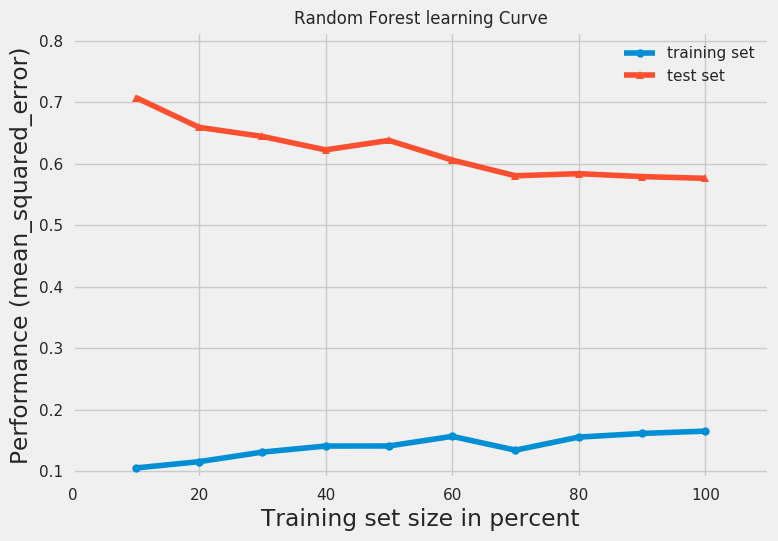

In [290]:
plot_learning_curves(train_x, train_y, val_x, val_y,rfc_cv_grid.best_estimator_,scoring='mean_squared_error')
plt.title('Random Forest learning Curve')
plt.show()

#### **Observations**
Random Forest model is badly overfitting . Needs proper parameter tuning

#### **Random Forest Feature Importance**

In [0]:
feature_importances = pd.DataFrame(rfc_cv_grid.best_estimator_.feature_importances_,
                                   index = train_x.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

<Figure size 1500x800 with 0 Axes>

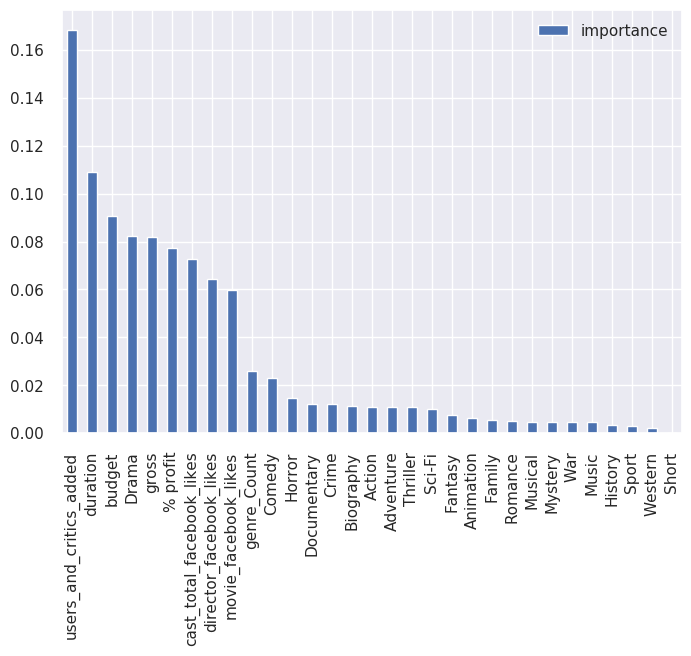

In [294]:
plt.figure(figsize=(15,8))
feature_importances.plot(kind='bar')

#### **Observation:** 

1. Duration,Combined Users and Critics reviews count,movie budget and movie facebook likes has highest impact on the IMDB Score
2. Drama,Comedy,Crime generes has more contributionin predicing the IMDB Score.

## **Using PCA approach**

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(train_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [338]:
pca.explained_variance_ratio_

array([0.21259464, 0.11521018, 0.10124458, 0.08838946, 0.0846792 ])

In [0]:
train_y.reset_index(drop=True, inplace=True)

In [0]:
PCA_train_data = pd.concat([principalDf, train_y], axis = 1)

In [332]:
PCA_train_data.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,imdb_score
0,-1.139141,0.172089,-0.836919,0.225011,0.785690,7.0
1,3.754333,-3.956347,1.053867,0.217529,-0.208597,7.2
2,-1.144260,0.107846,-0.171228,0.057167,-0.018604,6.1
3,0.533085,0.946863,0.835005,-1.012385,0.205747,6.1
4,1.890034,0.484620,1.599345,-0.147155,-0.123096,7.1


#### **Apply same steps on Validation data**

In [0]:
val_principalComponents = pca.fit_transform(val_x)
val_principalDf = pd.DataFrame(data = val_principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [0]:
val_y.reset_index(drop=True, inplace=True)

In [0]:
PCA_validation_data = pd.concat([val_principalDf, val_y], axis = 1)

In [325]:
PCA_validation_data.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,imdb_score
0,0.340368,0.813249,-0.012625,0.828539,-1.327066,6.3
1,-0.782890,-0.285314,-0.201152,-0.003870,0.315284,6.5
2,-0.704993,-0.491121,-0.207363,0.027441,-0.077072,5.2
3,-1.212138,0.083051,0.775843,0.402250,-0.941826,5.3
4,0.136791,-1.290714,0.353935,-0.075870,-0.134483,4.8


### **Applying basic regression model on PCA data**

In [0]:
 lnr = LinearRegression()
 lnr.fit(principalDf,train_y)
 pred_train = lnr.predict(principalDf)
 pred_val = lnr.predict(val_principalDf)
 train_mae=mean_absolute_error(train_y,pred_train)
 val_mae=mean_absolute_error(val_y,pred_val)
 MSE=mean_squared_error(val_y,pred_val)
 MSE_train=mean_squared_error(train_y,pred_train)
 r_sq=r2_score(val_y,pred_val)

In [335]:
  print('Train MeanAbsError:', train_mae )
  print('Validation MeanAbsError:', val_mae )
  print('Train MSE:', MSE_train )
  print('Validation MSE:', MSE )
  print('Validation Rsquared', r_sq )

Train MeanAbsError: 0.6910117341421481
Validation MeanAbsError: 0.6991977257726905
Train MSE: 0.8262859968651988
Validation MSE: 0.8777929352932237
Validation Rsquared 0.14578781193374013


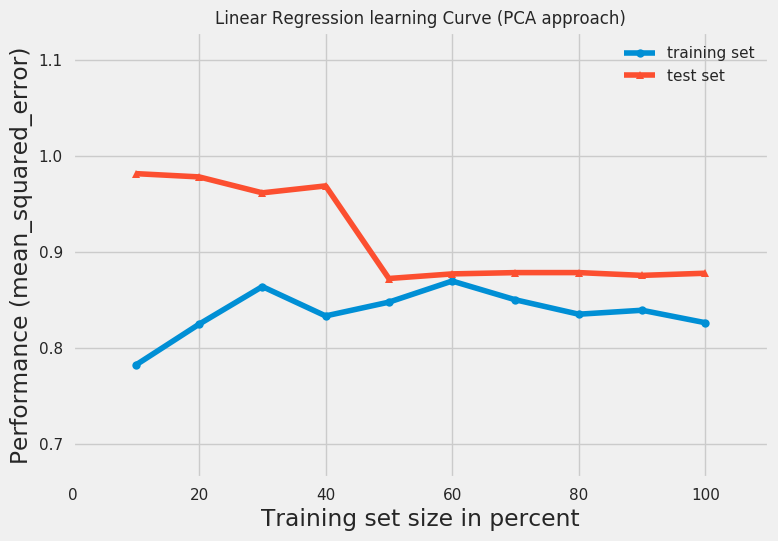

In [337]:
plot_learning_curves(principalDf, train_y, val_principalDf, val_y,lnr,scoring='mean_squared_error')
plt.title('Linear Regression learning Curve (PCA approach)')
plt.show()

<Figure size 1500x800 with 0 Axes>

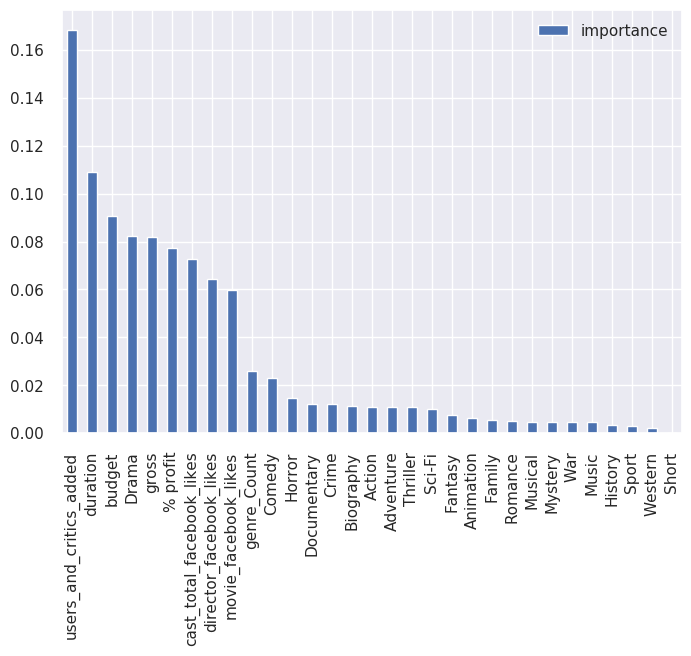

In [347]:
plt.figure(figsize=(15,8))
feature_importances.plot(kind='bar')

## **Conclusion**



1. New feature columns like 'users and critics added','% profit', and dummified genra proved singificant in prediction of IMDB score.
2.PCA speed ups the machine learning algorithms processing but we lose the predication explainability. 
3.  Model performace increases after including the 'Genre' feature  

